<h1><center>  DATA SCIENCE PROJECT </center></h1>
<center> Kristjan Pekk, Pärt Alango, Yaiza Rubio Chavida </center>
<center> University of Tartu </center>

<h1><center>  HIV ANALYSIS </center></h1>
<center>Study of HIV epidemiology indicators and treatments for children and adolescents.</center>


The two datasets used in this project were taken from: https://data.unicef.org/resources/dataset/hiv-aids-statistical-tables/.
To get better results for our project, we removed some data from the original datasets to have only the data needed to achieve our goals.

<center> </center>

First of all, we analyzed a dataset with HIV indicators from children and adolescents, depending on the continent, sex, age(0-19) and the year (1990-2019). 

To do this analysis we transformed the original dataset to a csv file. Then, we reduce it to study years from 2010 to 2019 and ages from 0-14, because we have no data about previous years and ages in the second dataset, so we couldn´t compare them. We also saw that some columns were not very useful for our analysis, so we eliminated them as well as incomplete rows. 

We cleaned most of the data changing different parameters in the following code and we exported it as a new csv file. 


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot
import random
pd.options.mode.chained_assignment = None  # default='warn' | for disposing of unneccesary errors
#indicators=pd.read_csv("Epidemiology.csv", sep=";", encoding='latin-1')
#indicators.drop(indicators.loc[indicators['Year']==1990].index, inplace=True)
#indicators.drop(indicators.loc[indicators['Age']!='Age 0-14'].index, inplace=True)
#indicators.drop("UNICEF Region", axis=1, inplace=True)
#indicators.to_csv("Tests.csv", index=False, encoding='utf8')

To have the data more separated, we divided this new csv file into two:
- AnnualDeaths.csv  (Estimated number of annual AIDS-related deaths of children 0-14 depending on country, sex and year (2010-2019))
- AnnualNewInfections.csv   (Estimated number of annual new HIV infections of children 0-14 depending on country, sex and year(2010-2019))

In [84]:
deaths=pd.read_csv("AnnualDeaths.csv", sep=",", encoding='latin-1')
print(deaths.shape)
deaths.head()

(2970, 6)


,Country/Region,Year,Sex,Value,Lower,Upper
0,Global,2010,Both,220,150,360
1,Global,2010,Female,110,73,180
2,Global,2010,Male,110,75,180
3,Global,2011,Both,200,130,330
4,Global,2011,Female,97,65,160


In [85]:
#todo optimize code
#todo: replace <100 and <... with random(0,100 etc)

#converting data "VALUE" to numeric, where applicable
i = 0
for val in deaths["Value"]:
    try:
        if int(val) < 100:
            val = int(val)*10
        deaths["Value"][i] = int(val)
    except ValueError:
        #todo: compute mean by upper&lower, use for replacing values with "<"
        if val.startswith("<"):
            deaths["Value"][i] = int(val[1:]) - 1 #remove "<" and deacrease by 1
            #deaths["Value"][i] = random.randint(0, int(val[1:]) - 1)
        else:
            deaths["Value"][i] = int(float(val.replace(",","."))*100)
            
    i+=1
#---------------------------upper---------------------------------
i=0
for val in deaths["Upper"]:
    try:
        if int(val) < 100:
            val = int(val)*10
        deaths["Upper"][i] = int(val)
    except ValueError:
        if val.startswith("<"):
            deaths["Upper"][i] = int(val[1:]) - 1 #remove "<" and deacrease by 1
        else:
            deaths["Upper"][i] = int(float(val.replace(",","."))*100)
        
    i+=1
#---------------------------lower--------------------------------
i=0
for val in deaths["Lower"]:
    try:
        if int(val) < 100:
            val = int(val)*10
        deaths["Lower"][i] = int(val)
    except ValueError:
        #todo: compute mean by upper&lower, use for replacing values with "<"
        if val.startswith("<"):
            deaths["Lower"][i] = int(val[1:]) - 1 #remove "<" and deacrease by 1
        else:
            deaths["Lower"][i] = int(float(val.replace(",","."))*100)
            
    i+=1

#-------------------------fixing false values----------------------------------------
for v in range(len(deaths)):
    if deaths["Value"][v] < deaths["Lower"][v] or deaths["Value"][v]*10 < deaths["Upper"][v]:
        deaths["Value"][v] = deaths["Value"][v] * 10
    if deaths["Upper"][v] < deaths["Lower"][v] or deaths["Upper"][v] < deaths["Value"][v]:
        deaths["Upper"][v] = deaths["Upper"][v] * 10
    if deaths["Lower"][v]*10 < deaths["Value"][v] or deaths["Lower"][v]*10 < deaths["Upper"][v]:
        deaths["Lower"][v] = deaths["Lower"][v] * 10
        
#for some reason, this check is also needed
for i in range(len(deaths["Upper"])):
   #print(str(deaths["Upper"][i]) + " | "+str(deaths["Lower"][i]) +" | "+ str(deaths["Value"][i]))
    if deaths["Lower"][i] - deaths["Upper"][i] > 0:
        deaths["Upper"][i] = deaths["Upper"][i]*10

In [86]:
#getting the averages
vals = deaths["Value"][:30]
genders = deaths["Sex"][:30]

total_M, count_M = 0,0
total_F, count_F = 0,0
total_B, count_B = 0,0

i = 0
for v in vals:
    if genders[i] == "Male":
        total_M += int(v)
        count_M += 1
    elif genders[i] == "Female":
        total_F += int(v)
        count_F += 1
    else:
        total_B += int(v)
        count_B += 1
    i+=1
    
print("Male  Female  Both")       
print(str(total_M/count_M) + " | " + str(total_F/count_F) + " | " + str((total_B/count_B))+"\n")

print("VALUE mean " + str(deaths["Value"].mean()))
print("VALUE std " + str(deaths["Value"].std())+"\n")

print("UPPER mean "+str(deaths.Upper.mean()))
print("UPPER std " + str(deaths["Upper"].std())+"\n")

print("LOWER mean "+str(deaths.Lower.mean()))
print("LOWER std " + str(deaths["Lower"].std())+"\n")

Male  Female  Both
727.0 | 711.0 | 771.0

VALUE mean 332.73771043771046
VALUE std 315.761990188983

UPPER mean 451.46026936026936
UPPER std 488.8573123240144

LOWER mean 251.92020202020203
LOWER std 212.8675776643942



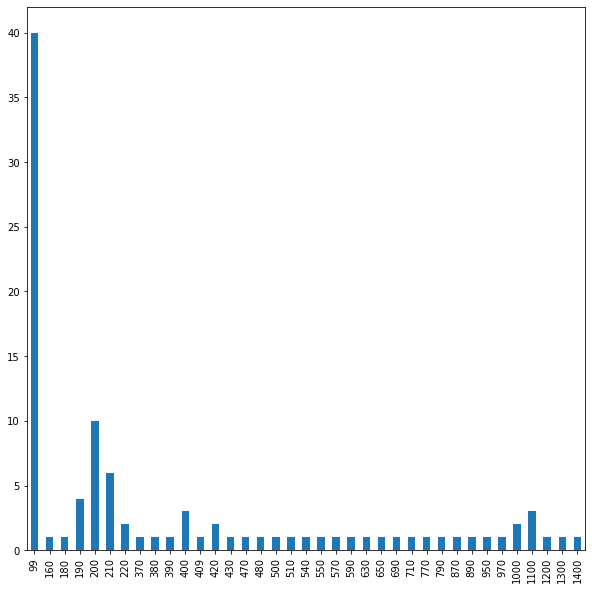

In [87]:
from numpy import histogram as hist
#hist(vals)
#hist = deaths[:30]["Value"].hist(bins = 50)
deaths["Value"][:100].value_counts().sort_index().plot(kind="bar")

deaths - still need better representation


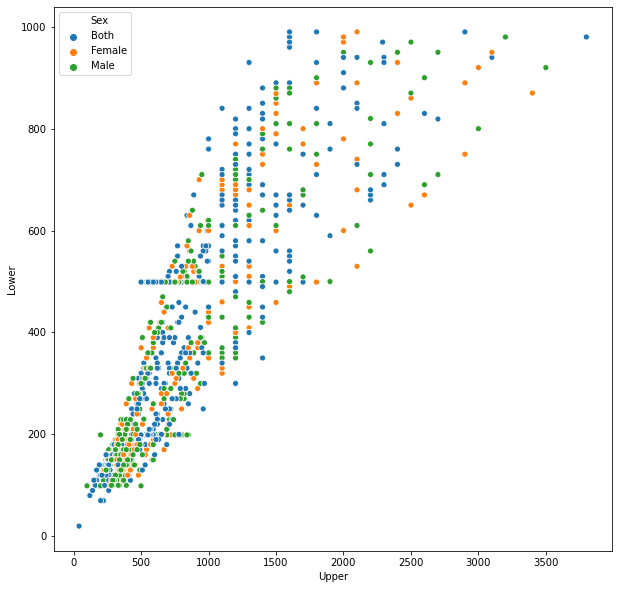

done


In [88]:
#todo - drop or modify weird rows

#----------------------
print("deaths - still need better representation")
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot('Upper', 'Lower', data=deaths, hue='Sex')
plt.show()
print("done")

In [7]:
infections=pd.read_csv("AnnualNewInfections.csv", sep=",", encoding='latin-1')
print(infections.shape)
infections.head()

(2940, 6)


,Country/Region,Year,Sex,Value,Lower,Upper
0,Global,2010,Both,310,200,500
1,Global,2010,Female,150,97,240
2,Global,2010,Male,160,100,250
3,Global,2011,Both,270,170,430
4,Global,2011,Female,130,85,210


Our UNICEF second dataset contained the percentage and the numbers of children(0-14 years) with HIV recieving ART treatment. In this dataset we had different indicators, some of them were the number of children, and the other ones were represented
by percentage. So we realized we couldn´t mix the values to get good results. To solve this problem we joined data as shown below. In this way, we simplify a lot the original data due to most of the information was twice. 

In [8]:
treatments=pd.read_csv("Treatment.csv", sep=";", encoding='latin-1')
print(treatments.shape)
treatments.head()

(930, 7)


,Country,Region,Year,Percentage,Lower,Upper,Number
0,Afghanistan,South Asia,2010,<1,<1,1.8,0
1,Afghanistan,South Asia,2011,1.8,<1,4.3,10
2,Afghanistan,South Asia,2012,2.0,<1,4.7,10
3,Afghanistan,South Asia,2013,3.4,1.7,8.1,10
4,Afghanistan,South Asia,2014,4.6,2.2,11.1,20


Finally, we separated one dataset to get one with analysis divided in 7 regions. These regions are: Eastern and Southern Africa, Sub-Saharan Africa, East and North Africa, Latin America and Caribbean, Middle  South Asia, East Asia and Pacific, West and Central Africa with values of years from 2010-2019.

(80, 6)


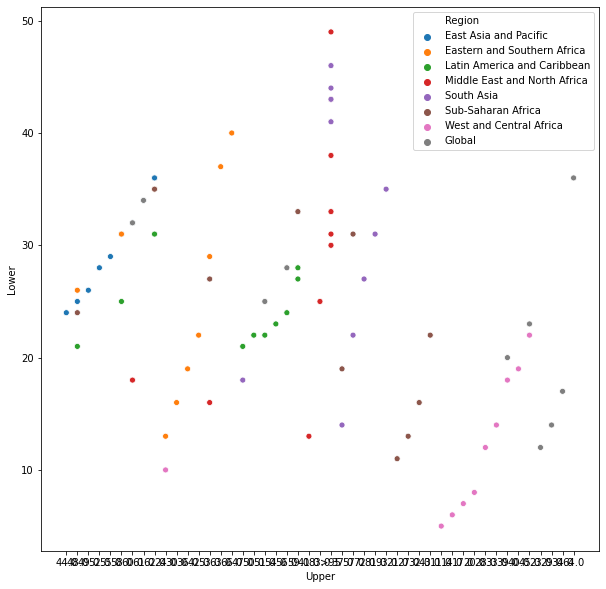

In [9]:
regions=pd.read_csv("Global.csv", sep=";", encoding='latin-1', header=None, names= ["Region","Year","Percentage","Lower","Upper", "Number"])
print(regions.shape)
regions.head()
#still need to work on that graph
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot('Upper', 'Lower', data=regions, hue='Region')
plt.show()

<center> Thank you </center>